In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("../../Datasets/final_tennis_dataset.csv")

In [19]:
df.head()

,tourney_id,tourney_name,draw_size,tourney_level,TOURNEY_DATE,match_num,winner_id,winner_seed,winner_entry,winner_name,...,WINNER_P_2NDWON_LAST_2000,LOSER_P_2NDWON_LAST_2000,WINNER_P_BPSAVED_LAST_2000,LOSER_P_BPSAVED_LAST_2000,WINNER_ELO_BEFORE,LOSER_ELO_BEFORE,ELO_DIFF,WINNER_ELO_SURFACE_BEFORE,LOSER_ELO_SURFACE_BEFORE,ELO_SURFACE_DIFF
0,2000-339,Adelaide,32.0,A,20000103,26,102796,3.0,NaN,Magnus Norman,...,0.500000,0.500000,0.5,0.5,1500.0,1500.0,0.0,1500.0,1500.0,0.0
1,2000-339,Adelaide,32.0,A,20000103,27,103720,6.0,NaN,Lleyton Hewitt,...,0.500000,0.500000,0.5,0.5,1500.0,1500.0,0.0,1500.0,1500.0,0.0
2,2000-339,Adelaide,32.0,A,20000103,28,102765,8.0,NaN,Nicolas Escude,...,0.500000,0.500000,0.5,0.5,1500.0,1500.0,0.0,1500.0,1500.0,0.0
3,2000-339,Adelaide,32.0,A,20000103,29,102358,1.0,NaN,Thomas Enqvist,...,0.500000,46.666667,0.5,50.0,1500.0,1516.0,-16.0,1500.0,1516.0,-16.0
4,2000-339,Adelaide,32.0,A,20000103,30,103720,6.0,NaN,Lleyton Hewitt,...,55.555556,47.368421,50.0,100.0,1516.0,1516.0,0.0,1516.0,1516.0,0.0


/tmp/ipykernel_3876606/675542957.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_surfaces, x='surface_raw', order=surface_order, palette=set2_colors)
/tmp/ipykernel_3876606/675542957.py:12: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.countplot(data=df_surfaces, x='surface_raw', order=surface_order, palette=set2_colors)


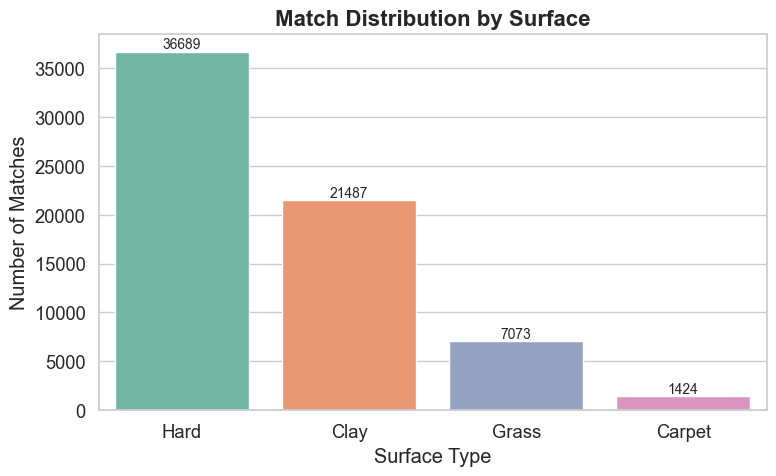

In [20]:
# Filter valid surfaces only
df_surfaces = df[df['surface_raw'].notna()]

# Set style and palette
sns.set_theme(style="whitegrid", font_scale=1.2)
set2_colors = sns.color_palette("Set2")

# Count matches per surface
surface_order = df_surfaces['surface_raw'].value_counts().index

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_surfaces, x='surface_raw', order=surface_order, palette=set2_colors)

# Add annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 5, f"{height:.0f}", ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title("Match Distribution by Surface", fontsize=16, weight='bold')
plt.xlabel("Surface Type")
plt.ylabel("Number of Matches")
plt.tight_layout()
plt.show()

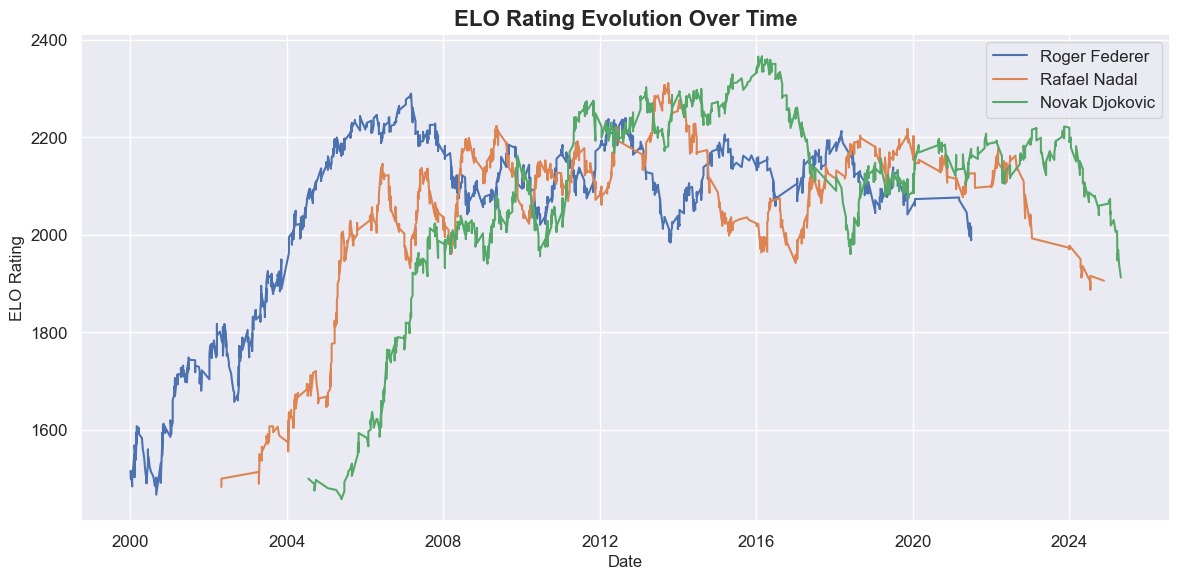

/tmp/ipykernel_3876606/2900470015.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='winrate', y='player_name', palette="Set2")


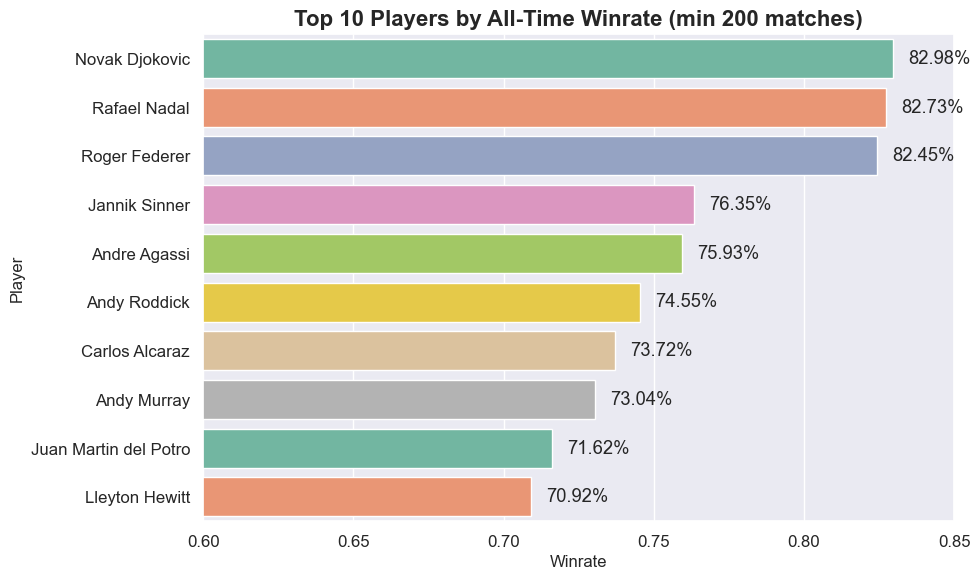

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
# df = pd.read_csv("/mnt/data/final_tennis_dataset.csv")

# Convert date
df['DATE'] = pd.to_datetime(df['TOURNEY_DATE'].astype(str), format='%Y%m%d', errors='coerce')

# Identify three legendary players by name
players = ["Roger Federer", "Rafael Nadal", "Novak Djokovic"]
player_ids = {}
for name in players:
    # find any match where this player appears as winner or loser
    winners = df[df['winner_name'] == name]['winner_id'].unique()
    losers  = df[df['loser_name'] == name]['loser_id'].unique()
    pid = None
    if len(winners) > 0:
        pid = winners[0]
    elif len(losers) > 0:
        pid = losers[0]
    player_ids[name] = pid

# Function to get ELO history for a player
def get_elo_history(df, player_id):
    # winner matches
    w = df[df['winner_id'] == player_id][['DATE', 'WINNER_ELO_BEFORE']].rename(columns={'WINNER_ELO_BEFORE':'ELO'})
    # loser matches
    l = df[df['loser_id'] == player_id][['DATE', 'LOSER_ELO_BEFORE']].rename(columns={'LOSER_ELO_BEFORE':'ELO'})
    hist = pd.concat([w, l]).sort_values('DATE')
    return hist

# Plot ELO history
sns.set_theme(style="darkgrid", font_scale=1.1)
plt.figure(figsize=(12, 6))
for name, pid in player_ids.items():
    hist = get_elo_history(df, pid)
    plt.plot(hist['DATE'], hist['ELO'], label=name)
plt.title("ELO Rating Evolution Over Time", fontsize=16, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("ELO Rating", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Compute winrates
wins = df['winner_id'].value_counts().rename('wins')
matches = pd.concat([df['winner_id'], df['loser_id']]).value_counts().rename('matches')
wr = pd.concat([wins, matches], axis=1).fillna(0)
wr['winrate'] = wr['wins'] / wr['matches']

# Filter for players with at least 200 matches
wr_filtered = wr[wr['matches'] >= 200].sort_values('winrate', ascending=False).head(10)
top10 = wr_filtered.reset_index().rename(columns={'index':'player_id'})

# Map player names (first occurrence)
name_map = {}
for pid in top10['player_id']:
    nm = df[df['winner_id'] == pid]['winner_name']
    if nm.empty:
        nm = df[df['loser_id'] == pid]['loser_name']
    name_map[pid] = nm.iloc[0] if not nm.empty else str(pid)
top10['player_name'] = top10['player_id'].map(name_map)

# Plot top 10 winrates
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='winrate', y='player_name', palette="Set2")
plt.title("Top 10 Players by All-Time Winrate (min 200 matches)", fontsize=16, weight='bold')
plt.xlabel("Winrate", fontsize=12)
plt.ylabel("Player", fontsize=12)
plt.xlim(0.6, 0.85)
for i, row in top10.iterrows():
    plt.text(row['winrate'] + 0.005, i, f"{row['winrate']:.2%}", va='center')
plt.tight_layout()
plt.show()


NameError: name 'lowess' is not defined

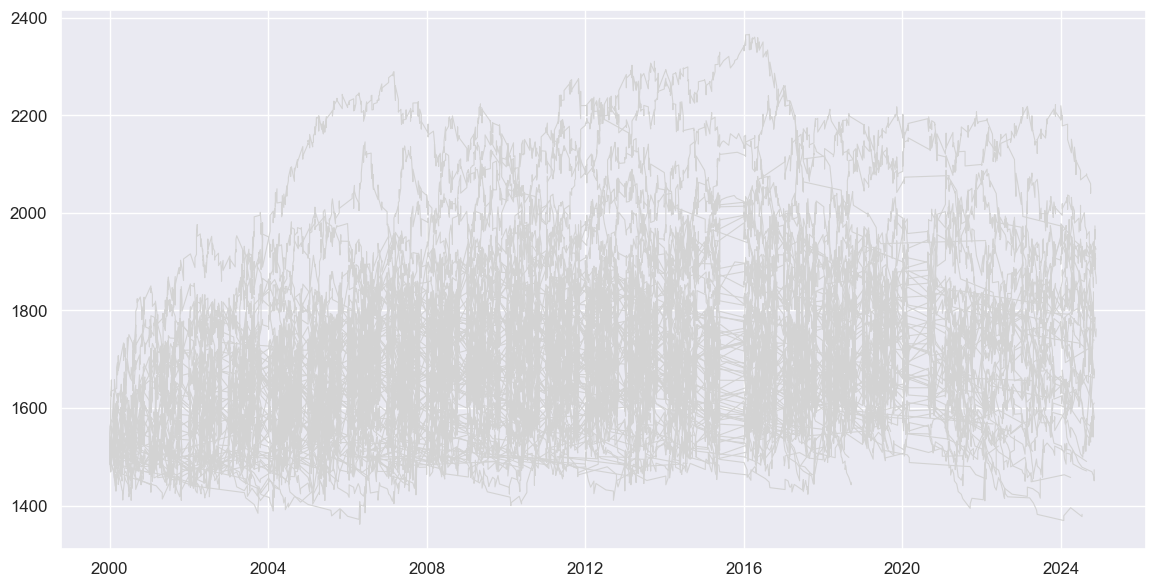

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
import datetime

# 1) LOAD DATA (only needed cols)
usecols = [
    "TOURNEY_DATE", "winner_id", "loser_id",
    "winner_name", "loser_name",
    "WINNER_ELO_BEFORE", "LOSER_ELO_BEFORE"
]

# 2) PARSE AND FILTER DATE RANGE 2000–2024
df['DATE'] = pd.to_datetime(
    df['TOURNEY_DATE'].astype(str),
    format='%Y%m%d', errors='coerce'
)
df = df[(df['DATE'] >= '2000-01-01') & (df['DATE'] <= '2024-12-31')]

# 3) HELPER TO GET A PLAYER'S RAW ELO HISTORY
def get_elo_history(df: pd.DataFrame, player_id: int) -> pd.DataFrame:
    w = (df[df['winner_id'] == player_id]
         [['DATE','WINNER_ELO_BEFORE']]
         .rename(columns={'WINNER_ELO_BEFORE':'ELO'}))
    l = (df[df['loser_id'] == player_id]
         [['DATE','LOSER_ELO_BEFORE']]
         .rename(columns={'LOSER_ELO_BEFORE':'ELO'}))
    return pd.concat([w, l]).sort_values('DATE')

# 4) IDENTIFY BACKGROUND SET: TOP 100 MOST ACTIVE PLAYERS
match_counts = pd.concat([df['winner_id'], df['loser_id']]).value_counts()
background_ids = match_counts.head(100).index.tolist()

# 5) DEFINE THE FIVE STARS TO HIGHLIGHT
stars = ["Roger Federer", "Rafael Nadal", "Novak Djokovic", 
         "Carlos Alcaraz", "Jannik Sinner"]
star_ids = {}
for name in stars:
    winners = df[df['winner_name'] == name]['winner_id'].unique()
    losers  = df[df['loser_name'] == name]['loser_id'].unique()
    star_ids[name] = (winners[0] if len(winners)>0 else losers[0])

# 6) PLOT
sns.set_theme(style="darkgrid", font_scale=1.1)
plt.figure(figsize=(14, 7))

# 6a) Background ELO curves in light gray
for pid in background_ids:
    hist = get_elo_history(df, pid)
    plt.plot(hist['DATE'], hist['ELO'],
             color='lightgray', linewidth=0.8, zorder=1)

# 6b) Overlay smoothed ELO for our five stars
palette = sns.color_palette("tab10", n_colors=len(stars))
for i, (name, pid) in enumerate(star_ids.items()):
    hist = get_elo_history(df, pid)
    # Prepare data for LOWESS smoothing
    xord = hist['DATE'].map(datetime.datetime.toordinal)
    loess_res = lowess(hist['ELO'], xord, frac=0.01)
    # Convert back to dates
    dates_smooth = [datetime.date.fromordinal(int(x)) for x in loess_res[:,0]]
    elo_smooth   = loess_res[:,1]
    plt.plot(dates_smooth, elo_smooth,
             label=name,
             color=palette[i],
             linewidth=2.2,
             zorder=2)

# 7) FINAL TOUCHES
plt.title("ELO Rating Evolution (2000–2024)\nBackground = Top 100 Active Players, Stars Highlighted", 
          fontsize=16, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("ELO Rating", fontsize=12)
plt.legend(title="Legends", loc='upper left')
plt.tight_layout()
plt.show()


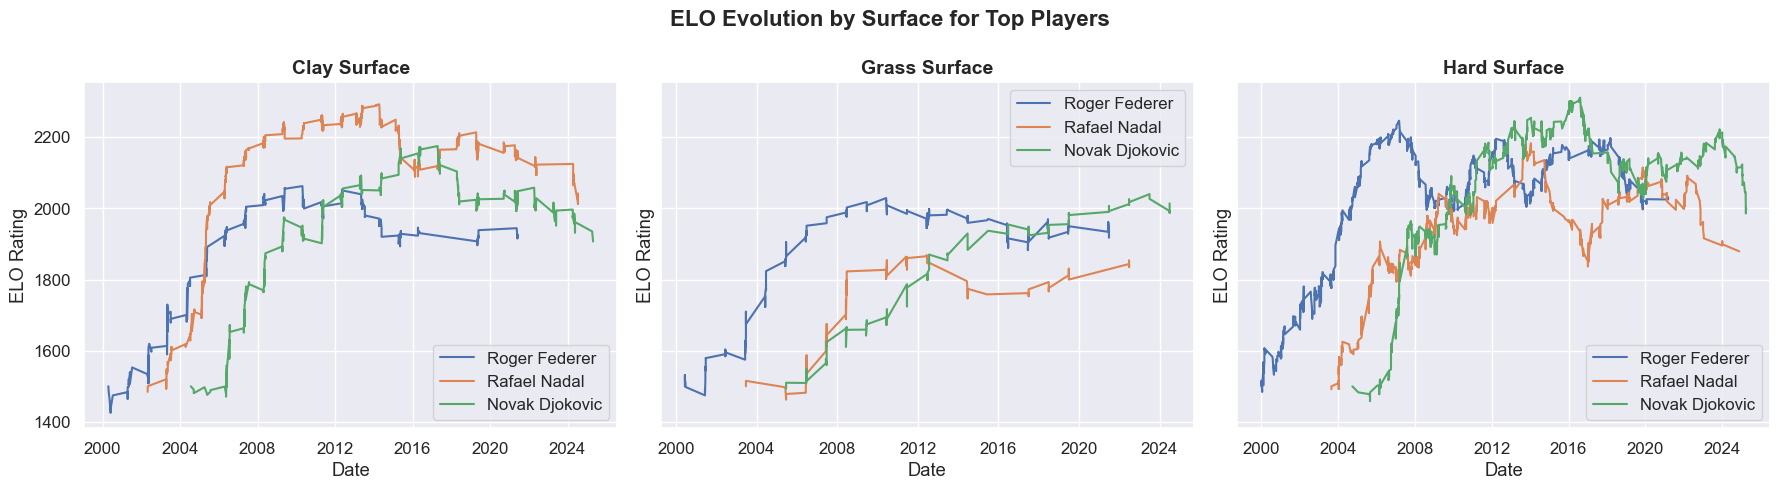

/tmp/ipykernel_3876606/2415209517.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


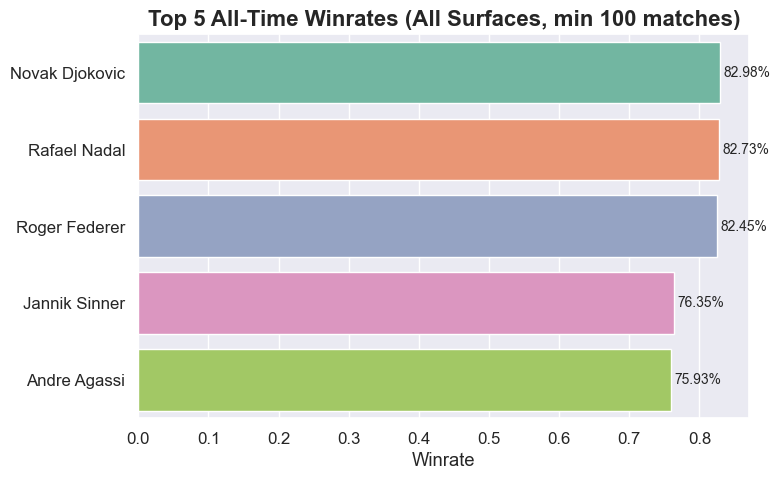

/tmp/ipykernel_3876606/2415209517.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3876606/2415209517.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_3876606/2415209517.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


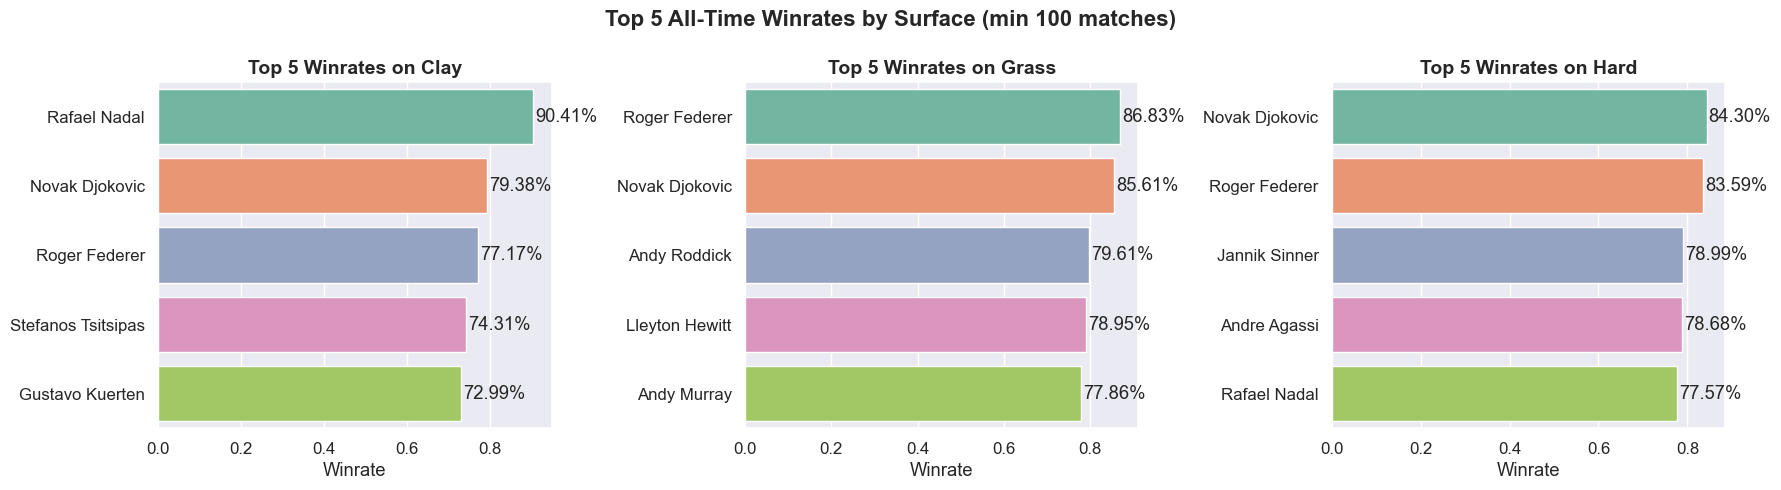

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) LOAD ONLY NECESSARY COLUMNS (memory-friendly)
usecols = [
    "TOURNEY_DATE", "surface_raw", 
    "winner_id", "loser_id", "winner_name", "loser_name",
    "WINNER_ELO_SURFACE_BEFORE", "LOSER_ELO_SURFACE_BEFORE"
]

# Parse date into pandas datetime
df['DATE'] = pd.to_datetime(
    df['TOURNEY_DATE'].astype(str), 
    format='%Y%m%d', errors='coerce'
)

# Identify three legends
players = ["Roger Federer", "Rafael Nadal", "Novak Djokovic"]
player_ids = {}
for name in players:
    w = df[df['winner_name'] == name]['winner_id'].unique()
    l = df[df['loser_name'] == name]['loser_id'].unique()
    # pick any occurrence
    player_ids[name] = w[0] if len(w) > 0 else l[0]

# Surfaces (drop Carpet)
surfaces = ["Clay", "Grass", "Hard"]

sns.set_theme(style="darkgrid", font_scale=1.1)

# 2) ELO EVOLUTION PER SURFACE
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for ax, surf in zip(axes, surfaces):
    for name, pid in player_ids.items():
        sub = df[df['surface_raw'] == surf]
        # winner history
        w_hist = sub[sub['winner_id'] == pid][['DATE','WINNER_ELO_SURFACE_BEFORE']]\
                 .rename(columns={'WINNER_ELO_SURFACE_BEFORE':'ELO'})
        # loser history
        l_hist = sub[sub['loser_id']  == pid][['DATE','LOSER_ELO_SURFACE_BEFORE']]\
                 .rename(columns={'LOSER_ELO_SURFACE_BEFORE':'ELO'})
        hist = pd.concat([w_hist, l_hist]).sort_values('DATE')
        ax.plot(hist['DATE'], hist['ELO'], label=name)
    ax.set_title(f"{surf} Surface", fontsize=14, weight='bold')
    ax.set_xlabel("Date")
    ax.set_ylabel("ELO Rating")
    ax.legend()
fig.suptitle("ELO Evolution by Surface for Top Players", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


# 3) TOP 5 WINRATES BY SURFACE (min. 100 matches)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, surf in zip(axes, surfaces):
    sub = df[df['surface_raw'] == surf]
    wins    = sub['winner_id'].value_counts().rename('wins')
    matches = pd.concat([sub['winner_id'], sub['loser_id']]).value_counts().rename('matches')
    wr = pd.concat([wins, matches], axis=1).fillna(0)
    wr['winrate'] = wr['wins'] / wr['matches']
    top5 = wr[wr['matches'] >= 100]\
           .sort_values('winrate', ascending=False)\
           .head(5)\
           .reset_index()\
           .rename(columns={'index':'player_id'})
    # map player_id → name
    name_map = {}
    for pid in top5['player_id']:
        nm = sub[sub['winner_id'] == pid]['winner_name']
        if nm.empty:
            nm = sub[sub['loser_id'] == pid]['loser_name']
        name_map[pid] = nm.iloc[0]
    top5['player_name'] = top5['player_id'].map(name_map)
    # horizontal barplot
    sns.barplot(
        data=top5, x='winrate', y='player_name',
        ax=ax, palette="Set2", orient='h'
    )
    ax.set_title(f"Top 5 Winrates on {surf}", fontsize=14, weight='bold')
    ax.set_xlabel("Winrate")
    ax.set_ylabel("")
    # annotate percentages
    for i, row in top5.iterrows():
        ax.text(row['winrate'] + 0.005, i, f"{row['winrate']:.2%}", va='center')
fig.suptitle("Top 5 All-Time Winrates by Surface (min 100 matches)", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


## Services figures

/tmp/ipykernel_556356/2500396020.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,
/tmp/ipykernel_556356/2500396020.py:21: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(data=df,


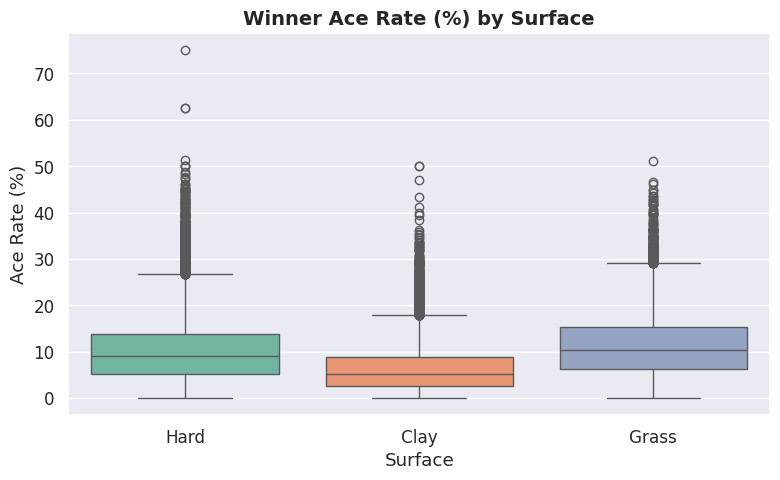

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1) COMPUTE SERVICE METRICS
df = df[df['surface_raw'] != 'Carpet']  # drop Carpet
df['SERVE_DOMINANCE']       = df['w_ace'] - df['l_ace']
df['WINNER_ACE_RATE']       = 100 * df['w_ace'] / df['w_svpt']
df['LOSER_ACE_RATE']        = 100 * df['l_ace'] / df['l_svpt']
df['WINNER_1ST_IN_PCT']     = 100 * df['w_1stIn'] / df['w_svpt']
df['LOSER_1ST_IN_PCT']      = 100 * df['l_1stIn'] / df['l_svpt']
df['BP_EFFICIENCY_WINNER']  = 100 * df['w_bpSaved'] / df['w_bpFaced'].replace(0, np.nan)
df['BP_EFFICIENCY_LOSER']   = 100 * df['l_bpSaved'] / df['l_bpFaced'].replace(0, np.nan)

# 2) STYLING
sns.set_theme(style="darkgrid", font_scale=1.1)
palette = sns.color_palette("Set2")

plt.figure(figsize=(8,5))
sns.boxplot(data=df, 
            x='surface_raw', y='WINNER_ACE_RATE', 
            palette=palette)
plt.title("Ace Rate (%) by Surface", fontsize=14, weight='bold')
plt.xlabel("Surface")
plt.ylabel("Ace Rate (%)")
plt.tight_layout()
plt.show()




/tmp/ipykernel_556356/2108501909.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='avg_ace_rate', y='player_name', palette="Set2")


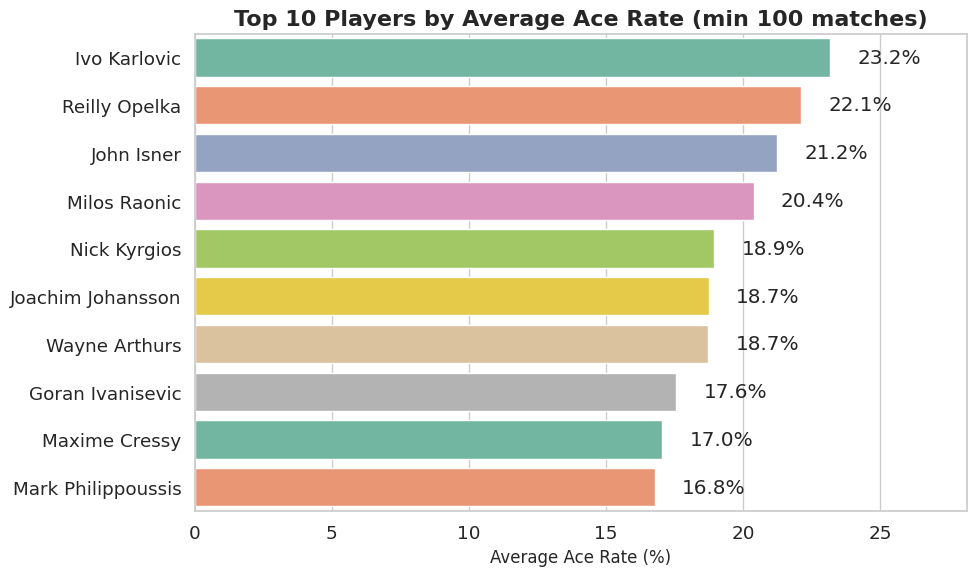

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Compute per-match ace rates
df['WINNER_ACE_RATE'] = df['w_ace'] / df['w_svpt'] * 100
df['LOSER_ACE_RATE']  = df['l_ace'] / df['l_svpt'] * 100

# Stack winner & loser rates into one DataFrame
winner_df = df[['winner_id', 'WINNER_ACE_RATE']].rename(columns={'winner_id':'player_id', 'WINNER_ACE_RATE':'ace_rate'})
loser_df  = df[['loser_id',  'LOSER_ACE_RATE'] ].rename(columns={'loser_id':'player_id',  'LOSER_ACE_RATE':'ace_rate'})
aces = pd.concat([winner_df, loser_df], ignore_index=True)

# Aggregate: average ace rate and match count per player
stats = aces.groupby('player_id').ace_rate.agg(['mean','count']).rename(columns={'mean':'avg_ace_rate','count':'matches'})
# Filter players with at least 100 matches
stats = stats[stats.matches >=100]

# Top 10 players by average ace rate
top10 = stats.sort_values('avg_ace_rate', ascending=False).head(10).reset_index()

# Map player_id to name (first occurrence)
name_map = {}
for pid in top10.player_id:
    nm = df[df['winner_id']==pid]['winner_name']
    if nm.empty:
        nm = df[df['loser_id']==pid]['loser_name']
    name_map[pid] = nm.iloc[0] if not nm.empty else str(pid)
top10['player_name'] = top10.player_id.map(name_map)

# Plot
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='avg_ace_rate', y='player_name', palette="Set2")
plt.title("Top 10 Players by Average Ace Rate (min 100 matches)", fontsize=16, weight='bold')
plt.xlabel("Average Ace Rate (%)", fontsize=12)
plt.ylabel("")
plt.xlim(0, top10.avg_ace_rate.max() + 5)
# Annotate bars
for i, row in top10.iterrows():
    plt.text(row['avg_ace_rate'] + 1, i, f"{row['avg_ace_rate']:.1f}%", va='center')
plt.tight_layout()
plt.show()


## Correlation Matrix

/tmp/ipykernel_3876606/732255743.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


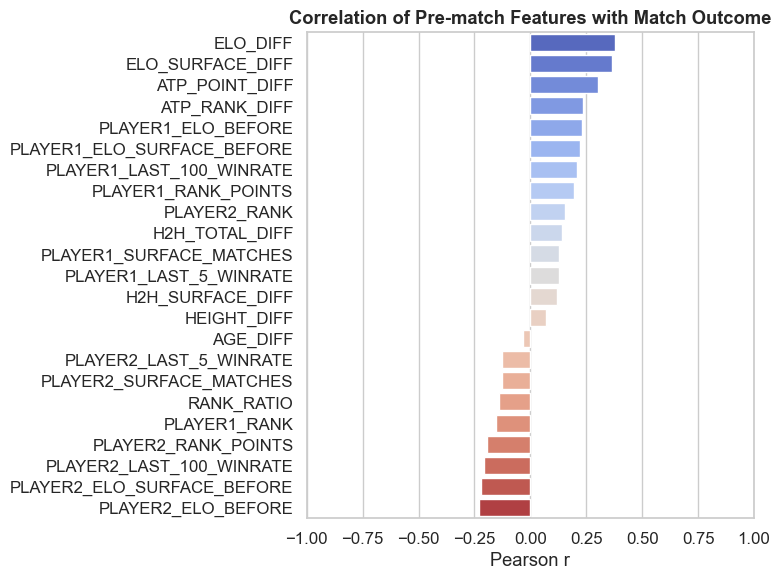

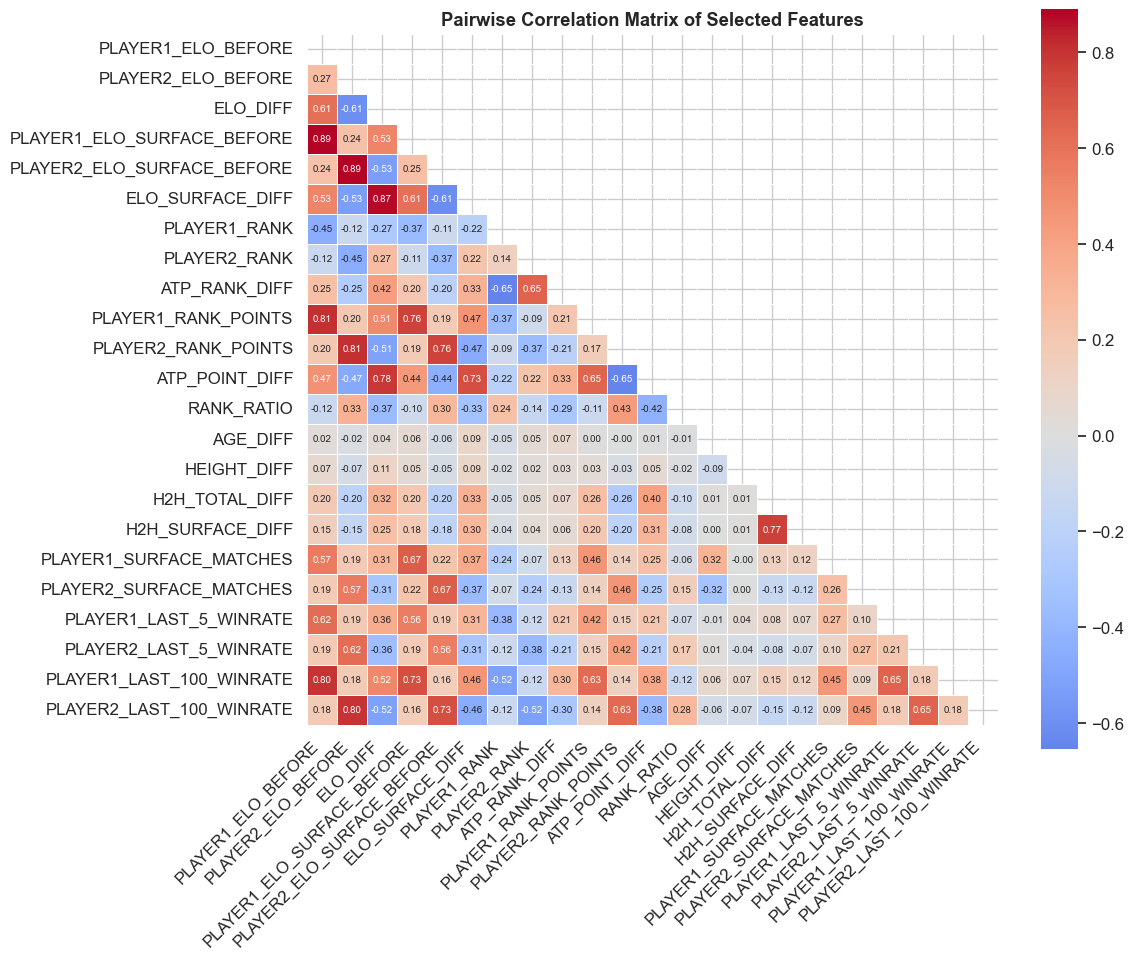

Top positive correlations with TARGET:
ELO_DIFF              0.378646
ELO_SURFACE_DIFF      0.364240
ATP_POINT_DIFF        0.300315
ATP_RANK_DIFF         0.236645
PLAYER1_ELO_BEFORE    0.229359 

Top negative correlations with TARGET:
PLAYER1_RANK                 -0.154845
PLAYER2_RANK_POINTS          -0.193824
PLAYER2_LAST_100_WINRATE     -0.208952
PLAYER2_ELO_SURFACE_BEFORE   -0.222366
PLAYER2_ELO_BEFORE           -0.229359


In [ ]:
# Correlation Analysis of Pre-match Features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the symmetric dataset (includes PLAYER1_/PLAYER2_ prefixes and TARGET)
df = pd.read_parquet(
    "../../Datasets/final_tennis_dataset_symmetric.parquet",
    engine="pyarrow"
)

# 2. Select only pre-match numeric features + TARGET
features = [
    # Global ELO
    "PLAYER1_ELO_BEFORE", "PLAYER2_ELO_BEFORE", "ELO_DIFF",
    # Surface ELO
    "PLAYER1_ELO_SURFACE_BEFORE", "PLAYER2_ELO_SURFACE_BEFORE", "ELO_SURFACE_DIFF",
    # Rank & points
    "PLAYER1_RANK", "PLAYER2_RANK", "ATP_RANK_DIFF",
    "PLAYER1_RANK_POINTS", "PLAYER2_RANK_POINTS", "ATP_POINT_DIFF",
    "RANK_RATIO",
    # Physical
    "AGE_DIFF", "HEIGHT_DIFF",
    # Head-to-head
    "H2H_TOTAL_DIFF", "H2H_SURFACE_DIFF",
    # Experience
    "PLAYER1_SURFACE_MATCHES", "PLAYER2_SURFACE_MATCHES",
    # Recent form (5-match winrate)
    "PLAYER1_LAST_5_WINRATE", "PLAYER2_LAST_5_WINRATE",
        "PLAYER1_LAST_100_WINRATE", "PLAYER2_LAST_100_WINRATE"
]

df_corr = df[features + ["TARGET"]].dropna()

# 3. Compute correlations
corr_matrix = df_corr.corr()
corr_with_target = corr_matrix["TARGET"].drop("TARGET").sort_values(ascending=False)

# 4. Barplot of feature ↔ TARGET
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(8, 6))
sns.barplot(
    x=corr_with_target.values,
    y=corr_with_target.index,
    palette="coolwarm"
)
plt.title("Correlation of Pre-match Features with Match Outcome", weight="bold")
plt.xlabel("Pearson r")
plt.ylabel("")
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()

# 5. Heatmap of feature–feature correlations with smaller annotations
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix.loc[features, features], dtype=bool))
sns.heatmap(
    corr_matrix.loc[features, features],
    mask=mask,
    annot=True,
    fmt=".2f",
    annot_kws={"size":7}, 
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=.5
)

plt.xticks(rotation=45, ha='right')
plt.title("Pairwise Correlation Matrix of Selected Features", weight="bold")
plt.tight_layout()
plt.show()

# 6. Print top correlations with TARGET
print("Top positive correlations with TARGET:")
print(corr_with_target.head(5).to_string(), "\n")
print("Top negative correlations with TARGET:")
print(corr_with_target.tail(5).to_string())